# Assignment 6 - Exercise 3
## Due June 11th at 14:00

Please note: 

- Read the instructions in the exercise PDF and in this notebook carefully.
- Add your solutions *only* at `YOUR CODE HERE`/`YOUR ANSWER HERE` and remove the corresponding `raise NotImplementedError()`.
- Do not chance the provided code and text, if not stated.
- Do not *add* or *delete* cells.
- Do not `import` additional functionality. 
- Before submitting: Please make sure, that your notebook can be executed from top to bottom `Menu -> Kernel -> Restart & Run all`. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
# load the training data
df = pd.read_csv('train.csv')
X_train, y_train = df[['x', 'y']].to_numpy(), df[['label']].to_numpy().flatten()

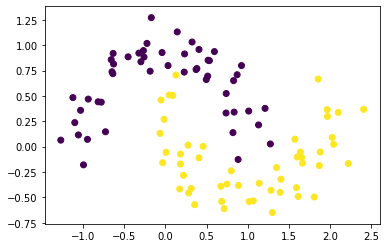

In [3]:
# Here you can inspect the data. This part will not be graded, but it is something that you should always do!
# X_train -= np.mean(X_train, axis=0)
# X_train /= np.std(X_train, axis=0)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

## a) Achieve zero training error


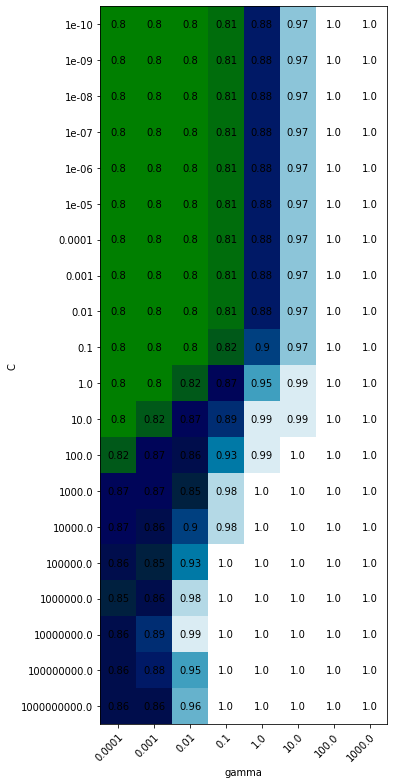

In [4]:
# put the values of hyperparameters for which overfitting happens into C and gamma
C = 1
gamma = 1

import warnings
warnings.filterwarnings("ignore")

best_score = np.NINF

Cs = np.logspace(-10, 9, num=20, base=10)
gammas = np.logspace(-4, 3, num=8, base=10)

results = np.zeros((len(Cs), len(gammas)))

for i, c in enumerate(Cs):
    for j, g in enumerate(gammas):
        clf = SVC(kernel="rbf", C=c, gamma=g).fit(X_train, y_train)
        score = clf.score(X_train, y_train)
        
        results[i, j] = score
        
        if best_score < score:
            best_score = score
            C = c
            gamma = g
        

fig, ax = plt.subplots(figsize=(16, 11))
im = ax.imshow(results, cmap="ocean")

ax.set_xticks(np.arange(len(gammas)))
ax.set_yticks(np.arange(len(Cs)))

ax.set_xticklabels(gammas)
ax.set_yticklabels(Cs)

ax.set_xlabel("gamma")
ax.set_ylabel("C")

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(Cs)):
    for j in range(len(gammas)):
        text = ax.text(j, i, results[i, j],
                       ha="center", va="center")

# ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

In [5]:
overfit = SVC(kernel='rbf', C=C, gamma=gamma).fit(X_train, y_train)
assert overfit.score(X_train, y_train) == 1.

- **Qualitatively, what is the range of hyperparameters for which interpolation happens?:** 
  - <font color="blue">Interpolation happens for high values of gamma. (See heatmap above.)</font>

## b) Assuming that the kernel matrix is of full rank, can kernel SVM achieve zero training error on any dataset? Explain.

- <font color="blue">Yes, the kernel SVM with a full kernel matrix rank can achieve zero error on any dataset since $\alpha = K^{\mathrm{+}} y$.</font>

# c) Now use cross-validation to obtain reasonable values for all hyperparameters.

In [6]:
# again, put the values of hyperparameters that you would choose into C and gamma
C = 1
gamma = 1

Cs = np.logspace(0, 3, num=4, base=10)
gammas = np.logspace(-4, 0, num=5, base=10)

clf = GridSearchCV(
    SVC(),
    param_grid={
        "kernel": ["rbf"],
        "C": Cs,
        "gamma": gammas
    }
)

clf.fit(X_train, y_train)
print(clf.best_score_)

C = clf.best_params_["C"]
gamma = clf.best_params_["gamma"]
print(clf.best_params_)

svm = SVC(kernel='rbf', C=C, gamma=gamma).fit(X_train, y_train)
print(svm.score(X_train, y_train))

0.97
{'C': 10.0, 'gamma': 1.0, 'kernel': 'rbf'}
0.99


In [7]:
# after cross-validation, load the test data
df = pd.read_csv('test.csv')
X_test, y_test = df[['x', 'y']].to_numpy(), df[['label']].to_numpy().flatten()

In [8]:
cross_validated = SVC(kernel='rbf', C=C, gamma=gamma).fit(X_train, y_train)
print('train accuracy is ', cross_validated.score(X_train, y_train))
print('test accuracy is ', cross_validated.score(X_test, y_test))
assert cross_validated.score(X_test, y_test) >= 0.95

train accuracy is  0.99
test accuracy is  0.99


# d) Plot the decision boundary of your classifiers together with the datapoints.

In [9]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

## Plot the decision boundary of your overfit classifier

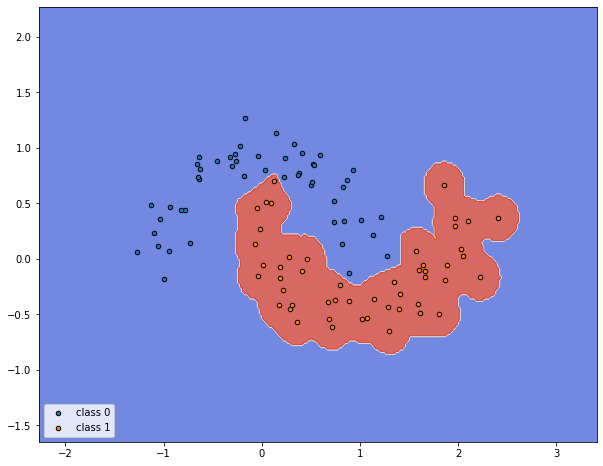

In [10]:
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)
fig, ax = plt.subplots(1, 1, figsize=(10,8))
plot_contours(ax, overfit, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], s=20, cmap=plt.cm.coolwarm, label='class 0', edgecolors='k')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], s=20, cmap=plt.cm.coolwarm, label='class 1', edgecolors='k')
plt.legend(loc="lower left")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
plt.show()

## Plot the decision boundary of your cross-validated classifier

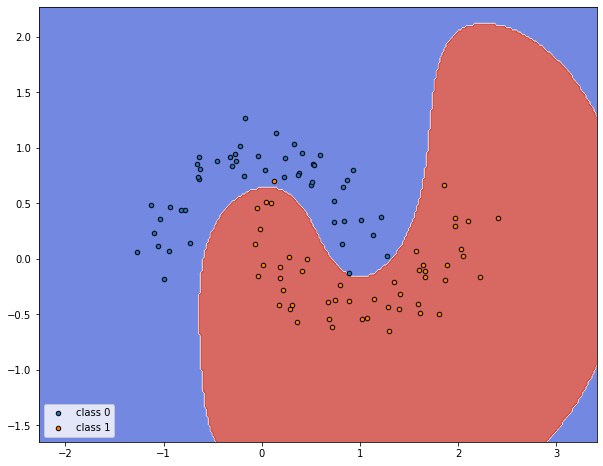

In [11]:
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)
fig, ax = plt.subplots(1, 1, figsize=(10,8))
plot_contours(ax, cross_validated, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], s=20, cmap=plt.cm.coolwarm, label='class 0', edgecolors='k')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], s=20, cmap=plt.cm.coolwarm, label='class 1', edgecolors='k')
plt.legend(loc="lower left")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
plt.show()

# e) Play around with hyperparametes and kernels

train accuracy is 0.88
test accuracy is 0.86


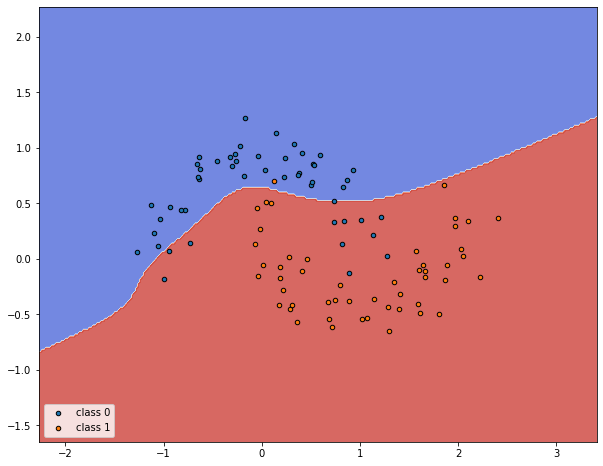

In [12]:
# train a classifier for your choice of kernel and hyperparameters 
clf = SVC(kernel='poly', C=10, degree=5).fit(X_train, y_train)
print('train accuracy is', clf.score(X_train, y_train))
print('test accuracy is', clf.score(X_test, y_test))

# TODO: you might also want to cross-validate your hyperparameters!

# plot the decision boundary
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)
fig, ax = plt.subplots(1, 1, figsize=(10,8))
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], s=20, cmap=plt.cm.coolwarm, label='class 0', edgecolors='k')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], s=20, cmap=plt.cm.coolwarm, label='class 1', edgecolors='k')
plt.legend(loc="lower left")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
plt.show()